<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Machine%20learning/linear_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание. Логистическая регрессия и разные виды линейной регрессии (с регуляризацией)

Задача 1: Первичный анализ данных House Prices(1 балл)

Датасет: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Требуется:

- Загрузите данные и выполните первичный анализ

- Проведите анализ распределения целевой переменной SalePrice

- Выявите и обработайте пропущенные значения в данных

In [ ]:
! gdown 1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-

Downloading...
From: https://drive.google.com/uc?id=1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-
To: /content/train.csv
100% 461k/461k [00:00<00:00, 14.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

**Загрузите данные и выполните первичный анализ**

In [ ]:
TRAIN = '/content/train.csv'
df = pd.read_csv(TRAIN, sep=',', index_col='Id')
df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [ ]:
# Описание датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [ ]:
# Статистические характеристики
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Проверка на пропущенные значения
df_null_cnt = df.isnull().sum().sort_values(ascending=False).rename('null_sum')
df_null_cnt[df_null_cnt > 0]

,null_sum
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageType,81
GarageFinish,81


**Проведите анализ распределения целевой переменной SalePrice**

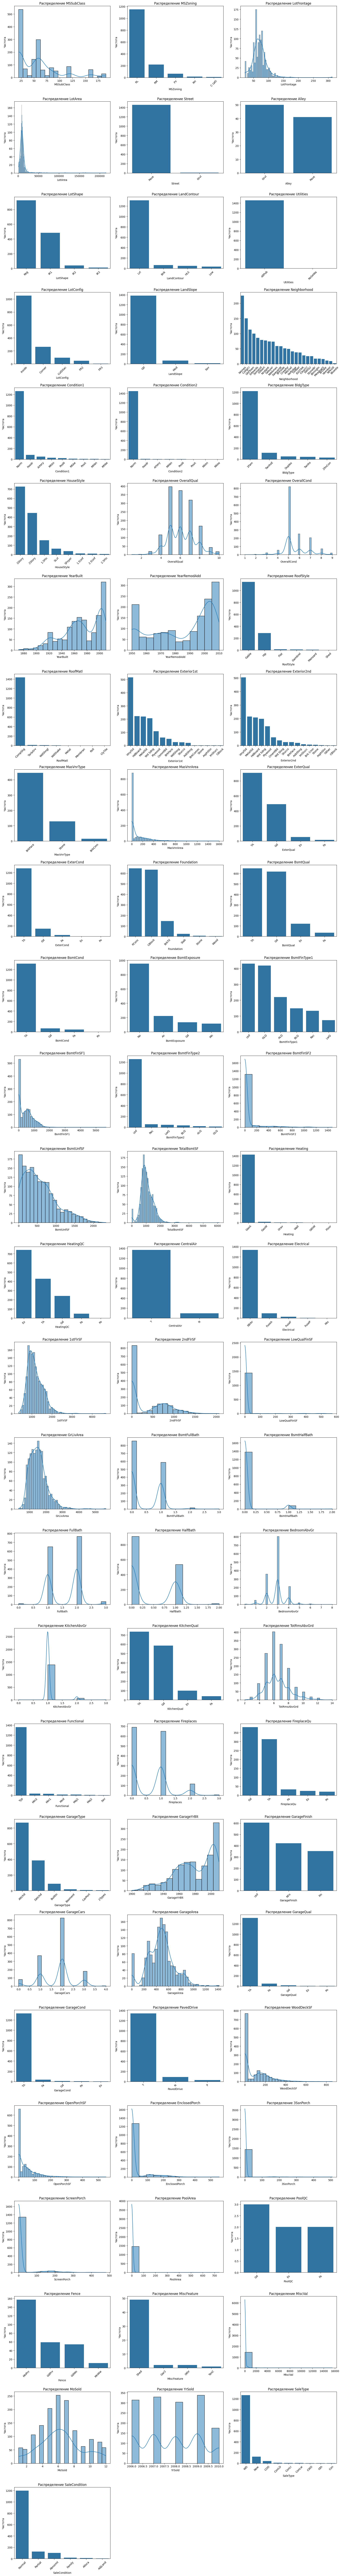

In [ ]:
# Построим распределения фичей для лучшего понимания датасета
cols_wt_target = [col for col in df.columns if col != 'SalePrice']
num_columns = df.shape[1]
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(18, 5 * num_rows))

for i, column in enumerate(cols_wt_target):
  plt.subplot(num_rows, 3, i + 1)
  if df[column].dtype in ['int64', 'float64']:
    sns.histplot(df[column], kde=True)
  else:
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.xticks(rotation=45)
  plt.title(f'Распределение {column}')
  plt.xlabel(column)
  plt.ylabel('Частота')

plt.tight_layout()
plt.show()

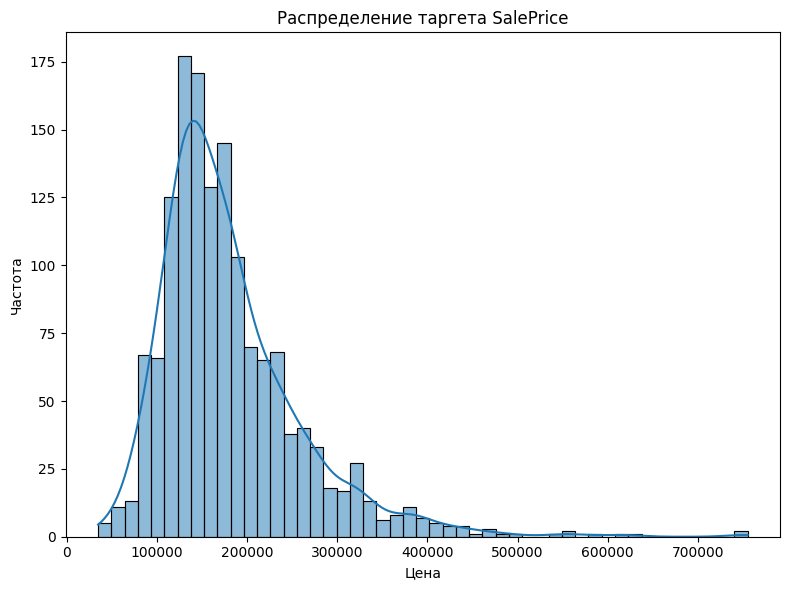

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение таргета SalePrice')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


По графику распределения таргета можем заметить тяжёлый хвост справа, то есть есть небольшое количество элитной недвижимости, которая смещает всё распределение - при медиане в 163 тысячи и максимальной цене дома в 755 тысяч имеем среднее значение 180 тысяч

**Выявите и обработайте пропущенные значения в данных**

In [ ]:
def fill_nulls(df: pd.DataFrame, threshold:int) -> pd.DataFrame:
  '''
  Удаляем фичи в случае количества пропусков больше threshold % и низкой корреляции с таргетом
  Иначе заполняем числовые фичи медианным значением, а категориальные - модой
  '''
  df_clean = df.copy()
  df_null_count = df.isnull().sum()[df.isnull().sum() > 0].reset_index().rename(columns={'index':'feature', 0:'null_count'})
  if df_null_count.empty:
    return df_clean

  row_count = df_clean.shape[0]
  df_null_count['null%'] = df_null_count['null_count'] / row_count * 100

  high_miss = df_null_count[df_null_count['null%'] > threshold]['feature'].tolist()
  else_miss = df_null_count[df_null_count['null%'] <= threshold]['feature'].tolist()

  numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])
  correlations = df_clean[numeric_cols].corr()['SalePrice'].abs().sort_values(ascending=False)
  important_cols = correlations[correlations.abs() >= 0.5].index.tolist()

  to_drop = [col for col in high_miss if col not in important_cols]
  if to_drop:
    df_clean = df_clean.drop(columns=to_drop)

  remain_cols = [col for col in high_miss if col not in to_drop] + else_miss
  if remain_cols:
    for col in remain_cols:
      if df_clean[col].dtype in ['int64', 'float64']:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
      else:
        mode_val = df_clean[col].mode()
        if mode_val.empty:
          df_clean[col] = df_clean[col].fillna('None')
        else:
          df_clean[col] = df_clean[col].fillna(mode_val.iloc[0])
  return df_clean

Видим, что после применения функции все столбцы заполнены, а так же несколько столбцов удалено

In [ ]:
df = fill_nulls(df=df, threshold=20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

Задача 2: Построение базовой модели (1 балл)

Требуется:

- Разделите данные на обучающую и тестовую выборки в соотношении 80/20

- Обучите модель LinearRegression на обучающей выборке, используя только числовые признаки

- Выберите метрику для сравнения моделей и обоснуйте свой выбор
- Рассчитайте свою метрику на тестовой выборке

In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_numeric
model =

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
255,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,294,250,0,0,0,0,0,0,6,2010
1067,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,380,0,40,0,0,0,0,0,5,2009
639,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,328,0,164,0,0,0,0,5,2008
800,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,240,0,0,264,0,0,0,0,6,2007
381,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,308,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24,0,...,440,0,22,0,0,0,0,0,3,2007
1131,50,65.0,7804,4,3,1928,1950,0.0,622,0,...,576,431,44,0,0,0,0,0,12,2009
1295,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,572,0,0,0,0,0,0,0,4,2006


Обоснование выбора метрики:

Задача 3: Предобработка данных и интерпретация модели (2 балл)

Требуется:

- Закодируйте категориальные переменные методами One-Hot Encoding или Label Encoding

- Масштабируйте числовые признаки с помощью StandardScaler

- Обучите LinearRegression на обучающих данных и оцените качество на тестовых данных по выбранной метрике

- Выведите 5 самых важных признаков по абсолютному значению коэффициентов

- Проанализируйте, какие факторы больше всего влияют на модель

Подсказка:
Зачем вообще нужен StandardScaler и One-Hot Encoding или Label Encoding ?

1) StandardScaler - для чего нужен:
- Нормализует масштаб числовых признаков (приводит к среднему=0, std=1)
- Зачем: Многие алгоритмы ML чувствительны к масштабу данных.
Пример проблемы: Признак "Площадь дома" (100-300 м²) и "Количество комнат" (1-5)без масштабирования алгоритм придаст больше веса площади, но после масштабирования - оба признака будут в одинаковом масштабе.

2) One-Hot Encoding/Label Encoding - для чего нужны:

- Label Encoding : Преобразует категории в числа. Сохраняет размерность данных, но может создать ложную порядковость (0 < 1 < 2)!

- One-Hot Encoding: Создает бинарные столбцы для каждой категории.Убирает ложную порядковость, но увеличивает размерность данных (проклятие размерности)

Выводы:

Задача 4: Регуляризация и подбор гиперпараметров (1 балл)

Требуется:

- Создайте Pipeline с MinMaxScaler и ElasticNet, подберите оптимальные параметры (alpha, l1_ratio) с помощью GridSearchCV

- Создайте Pipeline с StandardScaler и ElasticNet, подберите оптимальные параметры (alpha, l1_ratio) с помощью GridSearchCV

- Для оценки качества используйте выбранную ранее метрику

Вопросы для анализа:(1 балл)

1. Сравните оптимальные параметры в двух экспериментах

2. Сравните качество модели на тестовой выборке в обоих случаях

3. Проанализируйте, какие признаки были занулены в каждом эксперименте и объясните возможные причины

4. Сделайте вывод о влиянии типа масштабирования на качество линейной регрессии

Ответ на вопрос:

Задача 5: Бинарная классификация с помощью логистической регрессии (2 балла)

Требуется:

- Создайте бинарную целевую переменную expensive (1 - если цена выше медианы, 0 - в противном случае)

- Обучите модель LogisticRegression с L2-регуляризацией

- Выполните подбор гиперпараметров с помощью GridSearchCV

- Оцените качество модели с помощью метрики F1-score

- Для лучшей модели выведите Топ-5 самых важных признаков

Примечание: Не забудьте разделить данные на обучающую и тестовую выборки перед обучением модели с тем же random_state.

Проанализируй все модели и ответе на вопросы :(2 балла)

1) Какая модель показала наилучшие результаты для регрессии и почему?

2) Как регуляризация повлияла на веса признаков?

3) Какие признаки оказались наиболее важными для предсказания цены дома?

4) Насколько хорошо логистическая регрессия справилась с бинарной классификацией?

5) Какие проблемы в данных могли повлиять на качество моделей?

Ответ на вопросы: